## Pritish Karmakar (21MS179)

In [68]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

In [69]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

In [70]:
from scipy.optimize import curve_fit

# Q1

In [71]:
def fwd_diff(f,x,h):
    return (f(x+h)-f(x))/h

def bwd_diff(f,x,h):
    return (f(x)-f(x-h))/h

def c_diff(f,x,h):
    return (f(x+h)-f(x-h))/(2*h)

def fp_diff(f,x,h):
    return (f(x-2*h)-8*f(x-h)+8*f(x+h)-f(x+2*h))/(12*h)

In [72]:
H = [0.5, 0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 0.0005, 0.0002, 0.0001]
H = np.array(H)

In [73]:
f= lambda x: np.sin(x)

x0 = 2*np.pi/5

In [74]:
print("h\t fwd_diff\t bwd_diff\t c_diff\t\t fp_diff\n")

for i in range(len(H)):
    print("%.4f\t %.6f\t %.6f\t %.6f\t %0.6f" 
          %(H[i],fwd_diff(f,x0,H[i]),bwd_diff(f,x0,H[i]),
            c_diff(f,x0,H[i]),fp_diff(f,x0,H[i])))

h	 fwd_diff	 bwd_diff	 c_diff		 fp_diff

0.5000	 0.063449	 0.529153	 0.296301	 0.308392
0.2000	 0.212172	 0.401750	 0.306961	 0.309001
0.1000	 0.260989	 0.356015	 0.308502	 0.309016
0.0500	 0.285117	 0.332660	 0.308888	 0.309017
0.0200	 0.299486	 0.318507	 0.308996	 0.309017
0.0100	 0.304257	 0.313767	 0.309012	 0.309017
0.0050	 0.306638	 0.311393	 0.309016	 0.309017
0.0020	 0.308066	 0.309968	 0.309017	 0.309017
0.0010	 0.308541	 0.309492	 0.309017	 0.309017
0.0005	 0.308779	 0.309255	 0.309017	 0.309017
0.0002	 0.308922	 0.309112	 0.309017	 0.309017
0.0001	 0.308969	 0.309065	 0.309017	 0.309017


In [75]:
# exact value
Df = lambda x: np.cos(x)
y0 = Df(x0)
print("exact value:", round(y0,6))

exact value: 0.309017


In [76]:
# tolerance data
fwd_tol=abs(y0*np.ones(len(H))- fwd_diff(f,x0,H))
bwd_tol=abs(y0*np.ones(len(H))- bwd_diff(f,x0,H))
c_tol=abs(y0*np.ones(len(H))- c_diff(f,x0,H))
fp_tol=abs(y0*np.ones(len(H))- fp_diff(f,x0,H))

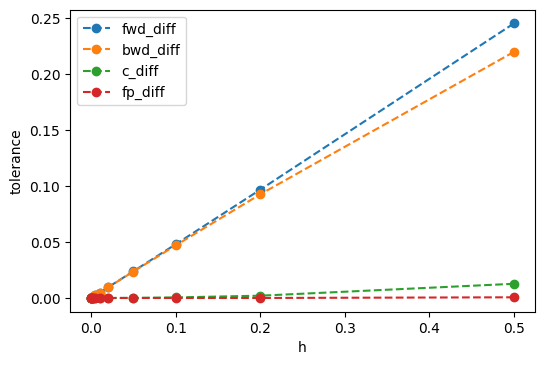

In [77]:
# plotting
plt.plot(H,fwd_tol,"--o",label='fwd_diff')
plt.plot(H,bwd_tol,"--o",label='bwd_diff')
plt.plot(H,c_tol,"--o",label='c_diff')
plt.plot(H,fp_tol,"--o",label='fp_diff')

plt.ylabel('tolerance')
plt.xlabel('h')
plt.legend()

plt.show()

In [78]:
# log of tolerance data
log_fwd_tol=np.log(fwd_tol)
log_bwd_tol=np.log(bwd_tol)
log_c_tol=np.log(c_tol)
log_fp_tol=np.log(fp_tol)


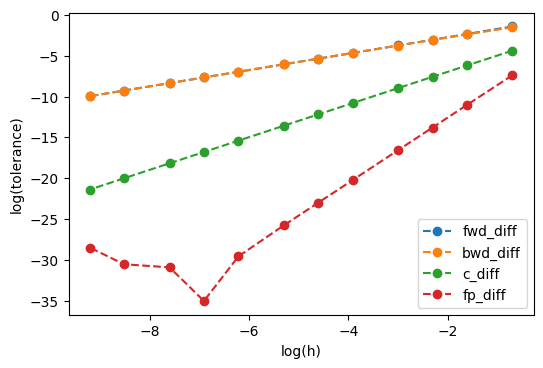

In [79]:
# plotting
plt.plot(np.log(H),log_fwd_tol,"--o",label='fwd_diff')
plt.plot(np.log(H),log_bwd_tol,"--o",label='bwd_diff')
plt.plot(np.log(H),log_c_tol,"--o",label='c_diff')
plt.plot(np.log(H),log_fp_tol,"--o",label='fp_diff')

plt.ylabel('log(tolerance)')
plt.xlabel('log(h)')
plt.legend()

plt.show()

In [80]:
# fitting
def linear_fit(x_data,y_data, init_guess ):
    linear = lambda x,m,c: m*x +c
    param, covar = curve_fit(linear, x_data, y_data, p0=(init_guess[0],init_guess[1]))
    return [param[0], param[1]]

In [81]:
init_guess = (0,0)
x_data =  np.log(H)

print("slope for fwd_diff:",linear_fit(x_data, log_fwd_tol, init_guess)[0])
print("slope for bwd_diff:",linear_fit(x_data, log_bwd_tol, init_guess)[0])
print("slope for c_diff  :",linear_fit(x_data, log_c_tol, init_guess)[0])
print("slope for fp_diff :",linear_fit(x_data, log_fp_tol, init_guess)[0])

slope for fwd_diff: 1.002818379898184
slope for bwd_diff: 0.9945608992064673
slope for c_diff  : 1.999240801160679
slope for fp_diff : 2.957077687893277


Five-point approximation is more efficient

# Q2

In [82]:
def lin_int(f,L,R,N):
    X = np.linspace(L,R,N)
    h = X[1]-X[0]
    Y = np.array([f(i) for i in X])
    s = 0
    i = 0
    while i<(len(X)-2):
        s+=(Y[i]+2*Y[i+1]+Y[i+2])*h/2
        i+=2
    return s

def qud_int(f,L,R,N):
    X = np.linspace(L,R,N)
    h = X[1]-X[0]
    Y = np.array([f(i) for i in X])
    s = 0 
    i = 0
    while i<(len(X)-2):
        s+=(Y[i]+4*Y[i+1]+Y[i+2])*h/3
        i+=2
    return s

def cub_int(f,L,R,N):
    X = np.linspace(L,R,N)
    h = X[1]-X[0]
    Y = np.array([f(i) for i in X])
    s = 0 
    i = 0 
    while i<(len(X)-3):
        s+=(Y[i]+3*Y[i+1]+3*Y[i+2]+Y[i+3])*3*h/8
        i+=3
    return s

def qut_int(f,L,R,N):
    X = np.linspace(L,R,N)
    h = X[1]-X[0]
    Y = np.array([f(i) for i in X])
    s = 0 
    i = 0 
    while i<(len(X)-4):
        s+=(7*Y[i]+32*Y[i+1]+12*Y[i+2]+32*Y[i+3]+7*Y[i+4])*2*h/45
        i+=4
    return s

In [83]:
g = lambda x: np.exp(x)

N=[20, 200, 2000, 20000]

N = np.array(N)

In [84]:
print("N\t Linear\t\t Quadratic\t Cubic\t\t Quartic\n")

for i in range(len(N)):
    print("%5d\t %.8f\t %.8f\t %.8f\t %0.8f" 
          %(N[i],lin_int(g,0,1,N[i]),qud_int(g,0,1,N[i]),
            cub_int(g,0,1,N[i]),qut_int(g,0,1,N[i])))

N	 Linear		 Quadratic	 Cubic		 Quartic

   20	 1.57927857	 1.57891417	 1.57891426	 1.32124868
  200	 1.70465997	 1.70465638	 1.70465638	 1.67761005
 2000	 1.71692238	 1.71692235	 1.71692235	 1.71420543
20000	 1.71814591	 1.71814591	 1.71814591	 1.71787410


In [85]:
# exact value
z0 = np.exp(1)-1
print("exact value:", round(z0,8))

exact value: 1.71828183


In [86]:
# tolerance data
lin_tol=np.array([abs(z0- lin_int(g,0,1,N[i])) for i in range(len(N))])
qud_tol=np.array([abs(z0- qud_int(g,0,1,N[i])) for i in range(len(N))])
cub_tol=np.array([abs(z0- cub_int(g,0,1,N[i])) for i in range(len(N))])
qut_tol=np.array([abs(z0- qut_int(g,0,1,N[i])) for i in range(len(N))])

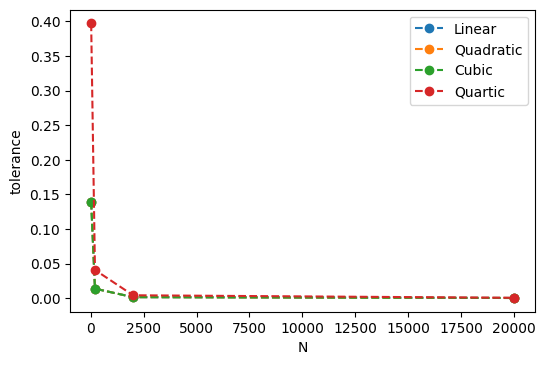

In [87]:
# plotting
plt.plot(N,lin_tol,"--o",label='Linear')
plt.plot(N,qud_tol,"--o",label='Quadratic')
plt.plot(N,cub_tol,"--o",label='Cubic')
plt.plot(N,qut_tol,"--o",label='Quartic')

plt.ylabel('tolerance')
plt.xlabel('N')
plt.legend()

plt.show()

In [88]:
# log of tolerance data
log_lin_tol=np.log(lin_tol)
log_qud_tol=np.log(qud_tol)
log_cub_tol=np.log(cub_tol)
log_qut_tol=np.log(qut_tol)

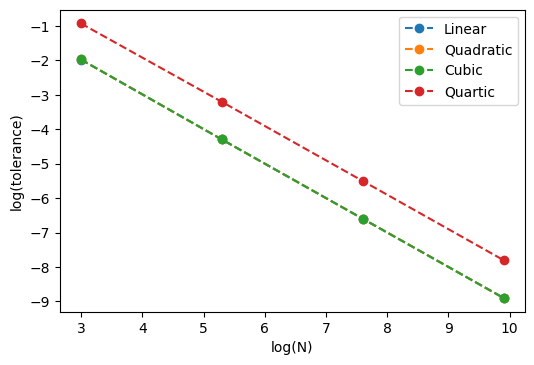

In [89]:
# plotting
plt.plot(np.log(N),log_lin_tol,"--o",label='Linear')
plt.plot(np.log(N),log_qud_tol,"--o",label='Quadratic')
plt.plot(np.log(N),log_cub_tol,"--o",label='Cubic')
plt.plot(np.log(N),log_qut_tol,"--o",label='Quartic')

plt.ylabel('log(tolerance)')
plt.xlabel('log(N)')
plt.legend()

plt.show()

In [90]:
init_guess = (0,0)
x_data =  np.log(N)

print("slope for fwd_diff:",linear_fit(x_data, log_lin_tol, init_guess)[0])
print("slope for bwd_diff:",linear_fit(x_data, log_qud_tol, init_guess)[0])
print("slope for c_diff  :",linear_fit(x_data, log_cub_tol, init_guess)[0])
print("slope for fp_diff :",linear_fit(x_data, log_qut_tol, init_guess)[0])

slope for fwd_diff: -1.0030127075501802
slope for bwd_diff: -1.0033637558290054
slope for c_diff  : -1.003363677510276
slope for fp_diff : -0.9964371765089121


# Q3

In [91]:
f = lambda x: x**(-2/3)*(1-x)**(-1/3)

$$f(x)=x^{-2/3}(1-x)^{-1/3}$$
$$\int_{0}^{1}f = \int_{0}^{1/2}f +\int_{1/2}^{1}f$$
substitute, $x^{1/3}=p$,
$$\int_{0}^{1/2}f = 3\int_{0}^{(1/2)^{1/3}} (1-p^3)^{-1/3} dp $$
substitute, $(1-x)^{2/3}=p$,
$$\int_{1/2}^{1}f=-3\int_{(1/2)^{1/3}}^{0} p(1-p^3)^{-2/3} dp$$

$$\int_{0}^{1}f = 3\int_{0}^{(1/2)^{1/3}} (1-p^3)^{-1/3} dp +3\int^{(1/2)^{1/3}}_{0} p(1-p^3)^{-2/3} dp$$


In [97]:
f1 = lambda p: 3*(1-p**3)**(-1/3)  
f2 = lambda p: 3*p*(1-p**3)**(-2/3)

In [98]:
inte=cub_int(f1,0,(1/2)**(1/3),2000)+cub_int(f2,0,(1/2)**(1/3),2000)
print('integration value:',inte)

integration value: 3.6245987277193734


In [99]:
exact=2*np.pi/np.sqrt(3)
print("exact value:",exact)

exact value: 3.6275987284684357
